### Une approche non supervisée 

#### LDA

Latent Dirichlet Allocation (LDA) est une technique d'apprentissage automatique utilisée pour la modélisation des sujets dans des ensembles de données textuelles.

L'objectif principal de LDA est d'extraire des sujets cachés à partir d'un corpus de documents, où chaque document est représenté comme un mélange de ces sujets.


LDA est un modèle probabiliste qui suppose que chaque document dans un corpus est généré par une distribution de sujets et que chaque sujet est une distribution de mots.


En utilisant un processus en deux étapes, LDA cherche à découvrir les distributions de sujets pour chaque document et les distributions de mots pour chaque sujet, permettant ainsi une représentation thématique des documents. Une fois entraîné, le modèle LDA peut être utilisé pour identifier les sujets principaux dans un corpus de textes et pour représenter chaque document en fonction de ces sujets.


In [1]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

In [2]:
data = pd.read_csv(f'data_final.csv')

In [3]:
data.shape

(43503, 3)

In [4]:
def train_lda_model(text, ngrams, no_topics=20):
    # Vectorisation du texte en utilisant TF-IDF
    vectorizer_train = TfidfVectorizer(analyzer='word',
                                       min_df=0.0,
                                       max_df=1.0,
                                       strip_accents=None,
                                       encoding='utf-8',
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000,
                                       ngram_range=(1, ngrams))  # n-grammes)
    tf_idf_matrix = vectorizer_train.fit_transform(text)
    
    # Initialisation et entraînement du modèle LDA
    lda = LatentDirichletAllocation(n_components=no_topics,
                                    max_iter=5,
                                    learning_method='online',
                                    learning_offset=50,
                                    random_state=11).fit(tf_idf_matrix)
    return lda, vectorizer_train, tf_idf_matrix

In [5]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))


In [6]:
#chosir le nombre de mots les plus significatifs à afficher pour chaque topic
no_top_words = 10


###### ngrams = 1 sur un échantillon du dataframe

On commence par tester LDA sur un echantillon de 2000 lignes

In [7]:
# Prendre un échantillon aléatoire de 2000 lignes du DataFrame
sample_data = data.sample(n=2000, random_state=42)

In [8]:
text = sample_data['Question']

In [9]:
lda_sample, vectorizer_train_sample, tf_idf_matrix_sample = train_lda_model(text, ngrams = 1, no_topics=20)

In [10]:
display_topics(lda_sample, vectorizer_train_sample.get_feature_names_out(), no_top_words)

Topic 0:
heroku model size test mov character ptr add pdf step
Topic 1:
storage kera firebase chart app io database mac control certificate
Topic 2:
window map project point using service seq work app create
Topic 3:
data bar object date provider entity article value integer json
Topic 4:
offset array region buffer size detect annotation image search binary
Topic 5:
div name html argument jquery connection cs script event mobile
Topic 6:
tile foo namespace print bar public class static asset xml
Topic 7:
user buffer system access window find disable memory video org
Topic 8:
npm video node file download io module user line regex
Topic 9:
artifactid groupid org java springframework kotlin dependency boot employee maven
Topic 10:
city latitude longitude point country jar dependency split something postgresql
Topic 11:
node column react tree component random row csv session spring
Topic 12:
frame docker spring switch understand layer nginx sql code template
Topic 13:
date customer notific

Ensuite LDA sur le dataframe entier

In [11]:
text = data['Question']

###### ngrams = 1

In [12]:
lda_1, vectorizer_train_1, tf_idf_matrix_1 = train_lda_model(text, ngrams = 1, no_topics=20)

In [13]:
display_topics(lda_1, vectorizer_train_1.get_feature_names_out(), no_top_words)

Topic 0:
pdf transaction mongodb report cursor document exception postgresql catch postgres
Topic 1:
table date query sql column select name value data database
Topic 2:
image data plot model matrix import numpy dataframe panda column
Topic 3:
server connection certificate error database socket aws connect ssl mysql
Topic 4:
android layout app activity com gradle java fragment intent google
Topic 5:
class std public int foo object type string function return
Topic 6:
request response json data http error url var post file
Topic 7:
thread memory time process array list loop map number algorithm
Topic 8:
io xcode iphone notification app device apple nil crash firebase
Topic 9:
java org spring class jar maven public bean springframework xml
Topic 10:
visual studio dll project cmake boost microsoft build window exe
Topic 11:
react module node component import angular npm const app export
Topic 12:
ruby rail gem hash sha opt rvm lib active ext
Topic 13:
int string char byte character gcc st

###### ngrams = 2

In [14]:
lda_2, vectorizer_train_2, tf_idf_matrix_2 = train_lda_model(text, ngrams = 2, no_topics=20)

In [15]:
display_topics(lda_2, vectorizer_train_2.get_feature_names_out(), no_top_words)

Topic 0:
table sql query date database column select data value name
Topic 1:
file python install command docker error package run directory version
Topic 2:
java org spring jar gradle android com maven eclipse dependency
Topic 3:
usr difference lib linux gcc cmake bin library usr local usr lib
Topic 4:
class public object method string property type value test name
Topic 5:
file self string python print model character import data line
Topic 6:
aws selenium driver lambda chrome flutter firefox role sdk option
Topic 7:
boost react react native native asset android library difference vector transform
Topic 8:
studio visual visual studio dll window exe project microsoft debug win
Topic 9:
thread memory process time code queue run socket using cpu
Topic 10:
image color size plot cell matrix frame height data width
Topic 11:
android layout activity fragment intent android layout widget view item app
Topic 12:
public string new void private java public void class static println
Topic 13:
in

###### ngrams = 3

In [16]:
lda_3, vectorizer_train_3, tf_idf_matrix_3 = train_lda_model(text, ngrams = 3, no_topics=20)

In [17]:
display_topics(lda_3, vectorizer_train_3.get_feature_names_out(), no_top_words)

Topic 0:
table query column select sql database name model user row
Topic 1:
android view layout self button activity item fragment cell app
Topic 2:
java org spring jar com maven gradle dependency springframework android
Topic 3:
would use like application using file way thread one need
Topic 4:
int std function foo const char cpp gcc type include
Topic 5:
file python install command docker error lib package run usr
Topic 6:
self request response error message data url json http file
Topic 7:
date sql datetime sql server time database mysql server format timestamp
Topic 8:
form input jquery button text value ajax javascript field function
Topic 9:
data plot matrix column value dataframe numpy panda import model
Topic 10:
div html cs image width page text font element style
Topic 11:
react module component node const angular import app function error
Topic 12:
hash key cache boost password sha window linux mac algorithm
Topic 13:
video audio stream camera play frame medium buffer recor

## Visualisation des topics en 2D

###### Préparation des Données pour la Visualisation pour n-grams = 1

Pour une visualisation plus intuitive et séparée, nous allons utiliser t-SNE

In [18]:
def transform_and_reduce(lda_model, tf_idf_matrix):
    """
    Transform documents to topic distribution using LDA and reduce dimensions using t-SNE.

    Parameters:
    lda_model (LatentDirichletAllocation): The trained LDA model.
    tf_idf_matrix (sparse matrix): The term-frequency inverse document frequency matrix.

    Returns: The 2D reduced topic matrix.
    """
    # Transform documents to topic distribution
    topic_matrix = lda_model.transform(tf_idf_matrix)

    # Reduce dimensionality with t-SNE
    tsne = TSNE(n_components=2, random_state=0)
    topic_matrix_2d = tsne.fit_transform(topic_matrix)

    return topic_matrix, topic_matrix_2d


In [19]:
topic_matrix_1, topic_matrix_2d_1 = transform_and_reduce(lda_1, tf_idf_matrix_1)

###### Préparation des Données pour la Visualisation pour n-grams = 2

In [20]:
topic_matrix_2, topic_matrix_2d_2 = transform_and_reduce(lda_2, tf_idf_matrix_2)

###### Préparation des Données pour la Visualisation pour n-grams = 3

In [21]:
topic_matrix_3, topic_matrix_2d_3 = transform_and_reduce(lda_3, tf_idf_matrix_3)

Chaque point représente un document, coloré selon le topic dominant

In [22]:
def show_topics(topic_matrix, topic_matrix_2d):
    '''
    display 2D topics
    '''
    plt.figure(figsize=(12, 8))
    plt.scatter(topic_matrix_2d[:, 0], topic_matrix_2d[:, 1], c=topic_matrix.argmax(axis=1))
    plt.colorbar()
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('2D Visualization of LDA Topics')
    plt.show()


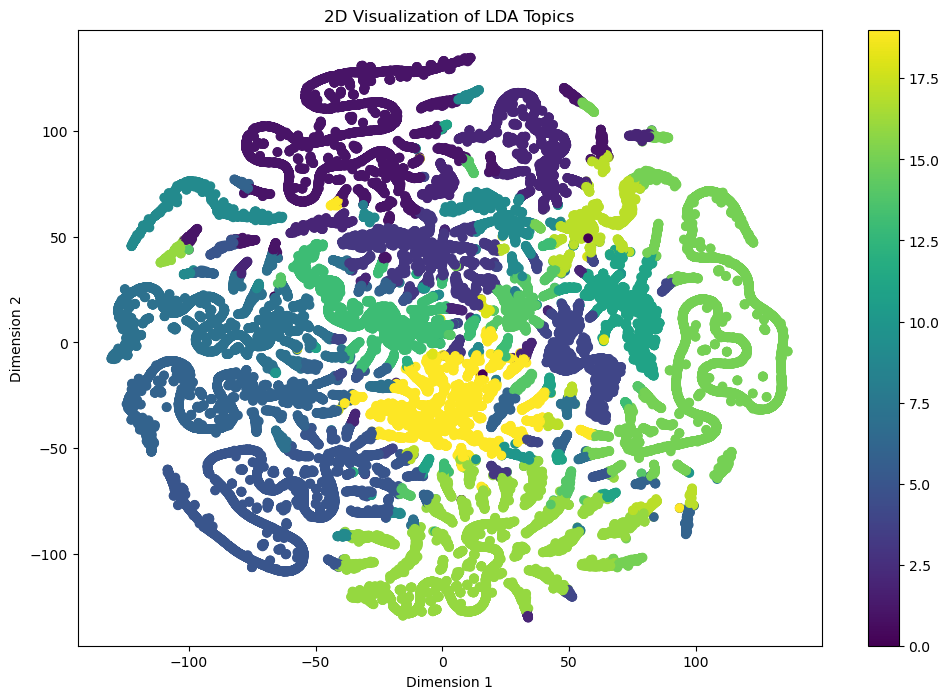

In [23]:
show_topics(topic_matrix_1, topic_matrix_2d_1)

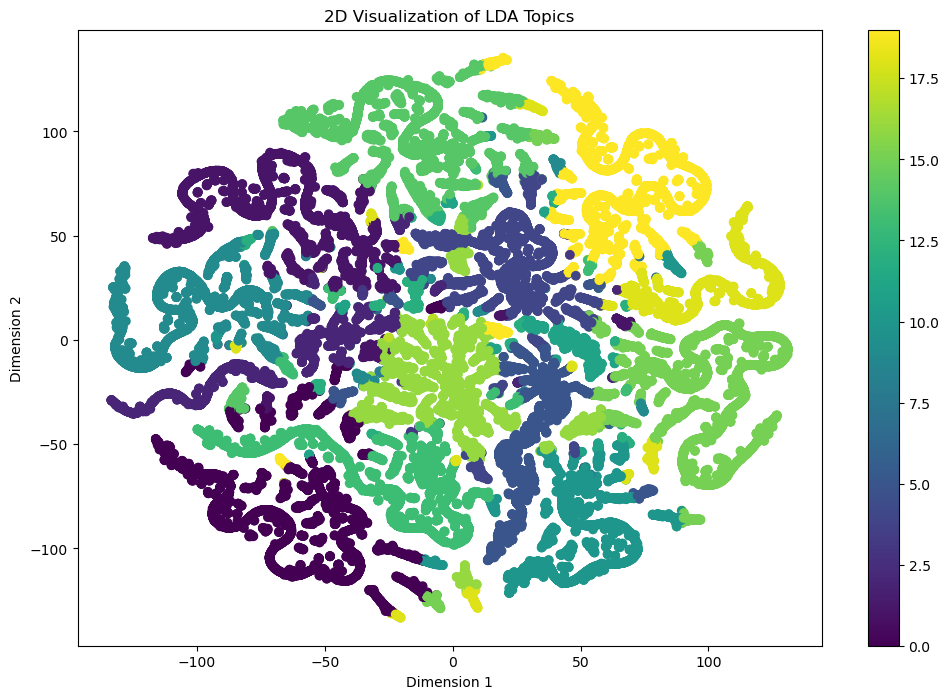

In [24]:
show_topics(topic_matrix_2, topic_matrix_2d_2)

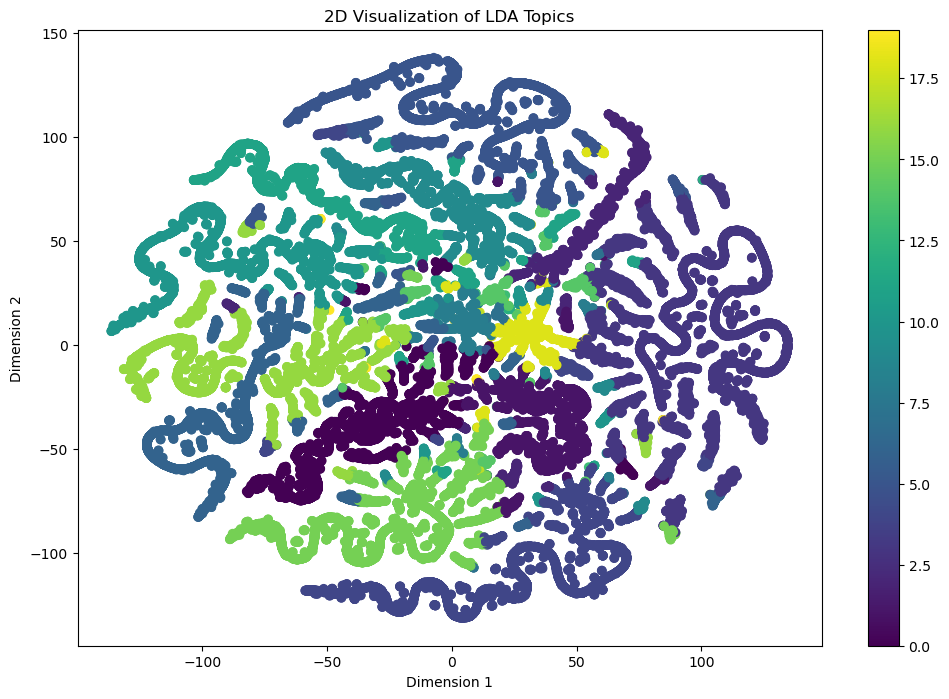

In [25]:
show_topics(topic_matrix_3, topic_matrix_2d_3)

## Visualisation Interactive avec PyLDAvis

Cette visualisation interactive permet d'explorer les sujets découverts par le modèle LDA et les mots associés à chaque sujet.

In [26]:
pyLDAvis.lda_model.prepare(lda_1, tf_idf_matrix_1, vectorizer_train_1)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
15     0.080538  0.077111       1        1  9.744302
16     0.105949 -0.004097       2        1  9.423427
1      0.114869  0.086749       3        1  8.760016
6      0.082673  0.019570       4        1  8.042838
5      0.117345  0.061448       5        1  7.781250
7      0.119375  0.056856       6        1  6.845938
19     0.050427 -0.116131       7        1  6.282622
2      0.112411  0.079289       8        1  5.263109
13     0.108406  0.036140       9        1  5.128529
9      0.050532 -0.044148      10        1  5.098039
3      0.056783 -0.076775      11        1  4.900100
11     0.046094 -0.064079      12        1  4.540303
4      0.043600 -0.029894      13        1  4.385642
17     0.085203  0.028306      14        1  3.578912
14     0.046775 -0.012444      15        1  3.447476
10    -0.076584 -0.251968      16        1  1.691537
18    -0.240623 -0.192700      17        1  1.472547
8     -0.318423  0.056554      18        1  1.360424
12    -0.328843  0.034969      19        1  1.141315
0     -0.256505  0.255242      20        1  1.111674, topic_info=           Term        Freq        Total Category  logprob  loglift
632         pdf  545.000000   545.000000  Default  30.0000  30.0000
745        ruby  510.000000   510.000000  Default  29.0000  29.0000
29      android  871.000000   871.000000  Default  28.0000  28.0000
446          io  548.000000   548.000000  Default  27.0000  27.0000
697        rail  465.000000   465.000000  Default  26.0000  26.0000
..          ...         ...          ...      ...      ...      ...
640         php    0.656639   438.521654  Topic20  -8.1109  -2.0047
693       query    0.408926   345.709100  Topic20  -8.5845  -2.2405
335        file    0.600227  1285.453451  Topic20  -8.2007  -3.1700
806        size    0.303995   401.784600  Topic20  -8.8810  -2.6874
178  connection    0.197284   276.431443  Topic20  -9.3134  -2.7458

[931 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1         1  0.039454  accept
1         3  0.039454  accept
1         4  0.499749  accept
1         5  0.105210  accept
1         6  0.039454  accept
...     ...       ...     ...
999       4  0.148798     zip
999       7  0.565432     zip
999       8  0.119038     zip
999      10  0.074399     zip
999      11  0.014880     zip

[6303 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 17, 2, 7, 6, 8, 20, 3, 14, 10, 4, 12, 5, 18, 15, 11, 19, 9, 13, 1])

In [27]:
pyLDAvis.lda_model.prepare(lda_2, tf_idf_matrix_2, vectorizer_train_2)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
14     0.097263 -0.030549       1        1  9.169356
15     0.112484  0.019940       2        1  8.183045
0      0.141629  0.002823       3        1  7.989916
1      0.038841 -0.055241       4        1  7.721137
16     0.117670 -0.053770       5        1  7.386610
19     0.100569 -0.019565       6        1  7.198138
9      0.108397 -0.023778       7        1  6.990980
4      0.130379 -0.014810       8        1  6.616498
13     0.107391  0.012377       9        1  6.438727
10     0.144117  0.022854      10        1  5.463841
5      0.132844  0.013207      11        1  5.284720
18     0.071061 -0.004076      12        1  5.196126
2      0.001365 -0.041779      13        1  4.998623
12     0.020439  0.022745      14        1  2.791729
11     0.004051  0.052241      15        1  2.525955
17    -0.281630 -0.189295      16        1  1.314931
8     -0.320475 -0.204383      17        1  1.309489
3     -0.275151 -0.028846      18        1  1.260773
6     -0.241196  0.288088      19        1  1.119793
7     -0.210047  0.231816      20        1  1.039612, topic_info=        Term        Freq       Total Category  logprob  loglift
701    react  619.000000  619.000000  Default  30.0000  30.0000
27   android  980.000000  980.000000  Default  29.0000  29.0000
575      net  552.000000  552.000000  Default  28.0000  28.0000
843   studio  495.000000  495.000000  Default  27.0000  27.0000
58       asp  458.000000  458.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
371  generic    0.251176   91.041566  Topic20  -9.0125  -1.3266
137  channel    0.251169   69.230627  Topic20  -9.0125  -1.0527
447   iphone    0.251165  210.241810  Topic20  -9.0125  -2.1636
777  service    0.251163  425.488762  Topic20  -9.0125  -2.8686
841   struct    0.251163  165.820753  Topic20  -9.0125  -1.9262

[922 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
2         1  0.349296  access
2         2  0.022228  access
2         3  0.063508  access
2         4  0.082561  access
2         5  0.073035  access
...     ...       ...     ...
997      10  0.092802     yes
997      11  0.046401     yes
997      12  0.007734     yes
997      13  0.007734     yes
997      15  0.007734     yes

[5775 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 16, 1, 2, 17, 20, 10, 5, 14, 11, 6, 19, 3, 13, 12, 18, 9, 4, 7, 8])

In [28]:
pyLDAvis.lda_model.prepare(lda_3, tf_idf_matrix_3, vectorizer_train_3)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.108687  0.017019       1        1  12.991422
5      0.078427  0.071205       2        1   8.281281
15     0.115797  0.027031       3        1   8.107144
6      0.102134  0.043171       4        1   7.397331
16     0.099192  0.027809       5        1   7.350437
4      0.119984 -0.051903       6        1   7.263491
10     0.066840 -0.067618       7        1   6.985226
0      0.113409 -0.014795       8        1   6.718890
11     0.099318  0.052220       9        1   5.864193
9      0.110525 -0.106477      10        1   5.249012
1      0.074049 -0.095242      11        1   5.165540
2      0.032072  0.118567      12        1   4.311033
14    -0.038213  0.232383      13        1   2.951529
18     0.078765 -0.119165      14        1   2.586836
8      0.075092 -0.039118      15        1   2.564568
7     -0.127181  0.028514      16        1   1.513842
17    -0.322626  0.184985      17        1   1.263053
13    -0.305015 -0.158481      18        1   1.175296
19    -0.253381 -0.254499      19        1   1.173249
12    -0.227875  0.104394      20        1   1.086624, topic_info=        Term         Freq        Total Category  logprob  loglift
411    image  1086.000000  1086.000000  Default  30.0000  30.0000
952    video   649.000000   649.000000  Default  29.0000  29.0000
158    color   654.000000   654.000000  Default  28.0000  28.0000
217     date   625.000000   625.000000  Default  27.0000  27.0000
466      key   721.000000   721.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
746      run     0.669383   527.516004  Topic20  -8.0762  -2.1475
491  library     0.608813   455.312358  Topic20  -8.1710  -2.0951
494     line     0.604893   498.145404  Topic20  -8.1775  -2.1915
974   within     0.242794   185.060934  Topic20  -9.0903  -2.1141
326     file     0.256217  1241.476541  Topic20  -9.0365  -3.9637

[931 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1         1  0.088062  accept
1         2  0.025161  accept
1         3  0.100643  accept
1         4  0.364830  accept
1         5  0.050321  accept
...     ...       ...     ...
996       6  0.024869    year
996       7  0.024869    year
996       8  0.074607    year
996      10  0.116055    year
996      16  0.472510    year

[5647 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 16, 7, 17, 5, 11, 1, 12, 10, 2, 3, 15, 19, 9, 8, 18, 14, 20, 13])